<a href="https://colab.research.google.com/github/arima35/Belajar-Machine-Learning-untuk-Pemula/blob/main/Copy_of_%5BClustering%5D_Submission_Akhir_BMLP_Arief_Indra_Kusuma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [401]:
# Deskripsi Dataset
# Dataset ini berisi data tentang faktor risiko penyakit jantung, dengan berbagai fitur numerik dan kategorikal.
# Beberapa fitur termasuk usia, jenis kelamin, kolesterol, tekanan darah, dan hasil dari tes kesehatan lainnya.
# Dataset ini digunakan untuk menganalisis faktor-faktor yang mempengaruhi kejadian penyakit jantung.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [402]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [403]:
# Memuat dataset
dataset_path = 'https://raw.githubusercontent.com/arima35/Belajar-Machine-Learning-untuk-Pemula/main/heart.csv'  # Ubah sesuai dengan lokasi file Anda
df = pd.read_csv(dataset_path)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**a. Memahami Struktur Data**

Pada tahap pertama, kita akan memeriksa struktur dataset untuk melihat jumlah baris dan kolom serta jenis data di setiap kolom.

In [404]:
# Menampilkan informasi umum tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 baris pertama untuk memahami data
print("\n5 Baris Pertama Dataset:")
print(df.head())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

5 Baris Pertama Dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal 

**b. Menangani Data yang Hilang**

Identifikasi nilai yang hilang dalam dataset dan tentukan bagaimana cara menanganinya. Misalnya, kita bisa menghapus baris dengan nilai yang hilang atau mengisi dengan nilai rata-rata.

In [405]:
# # Mengecek nilai yang hilang pada setiap kolom
# print("\nJumlah Nilai yang Hilang per Kolom:")
# print(df.isnull().sum())

# Menangani data yang hilang
# Hanya menghitung rata-rata untuk kolom numerik
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


# Jika ingin menghapus baris dengan nilai yang hilang
# df.dropna(inplace=True)

# Mengecek apakah ada nilai yang hilang setelah ditangani
print("\nJumlah Nilai yang Hilang setelah Penanganan:")
print(df.isnull().sum())



Jumlah Nilai yang Hilang setelah Penanganan:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


**c. Analisis Distribusi dan Korelasi**

Setelah data siap, kita akan menganalisis distribusi variabel numerik dan melihat korelasi antar fitur untuk mendapatkan wawasan lebih lanjut.

- i. Distribusi Variabel Numerik

   Analisis distribusi variabel numerik dengan menggunakan histogram atau boxplot.

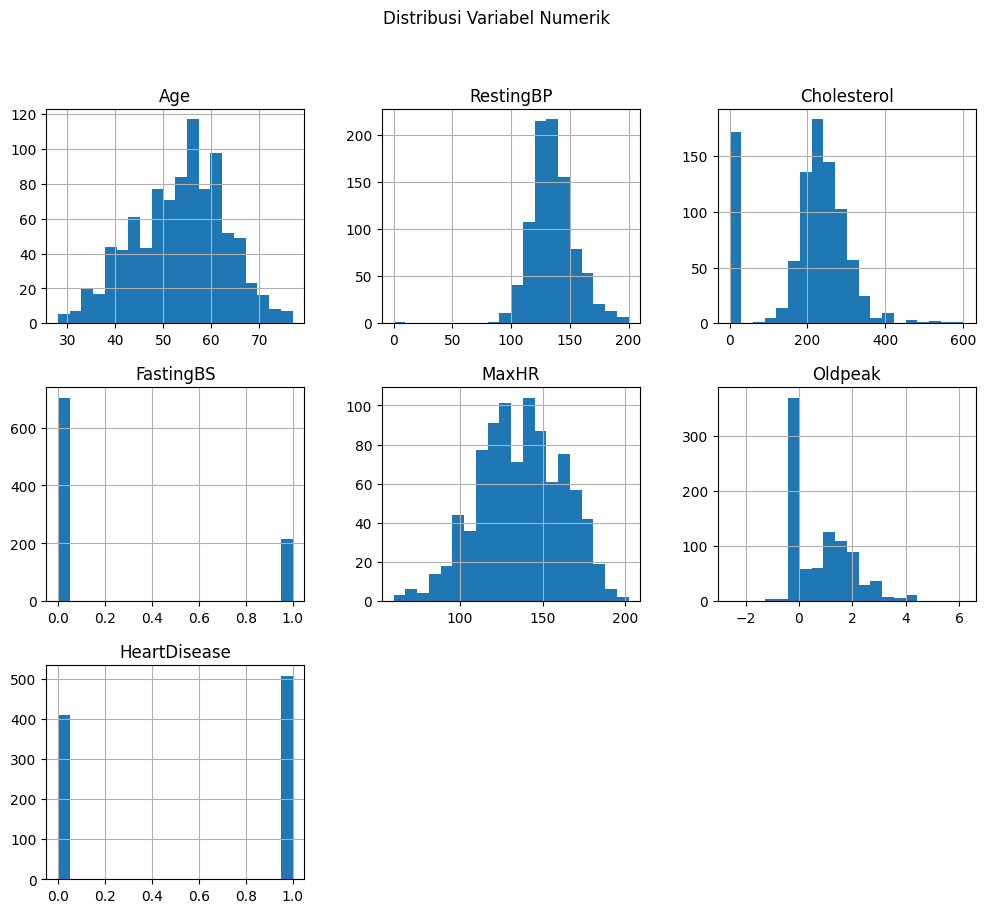

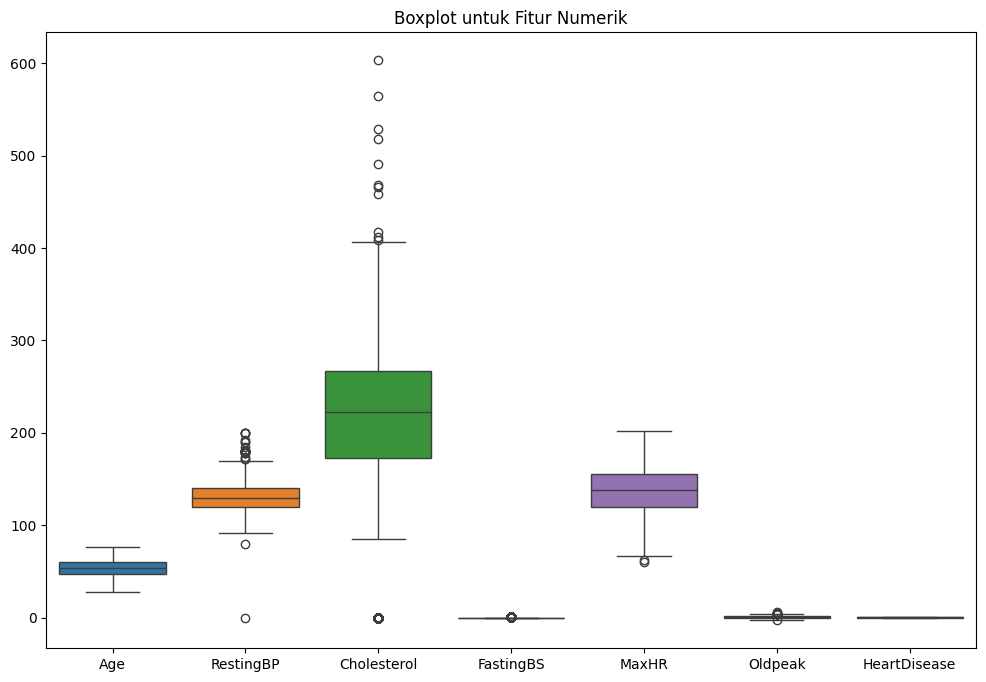

In [406]:
# Visualisasi distribusi variabel numerik
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

# Boxplot untuk melihat outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot untuk Fitur Numerik')
plt.show()


- ii. Matriks Korelasi

  Periksa hubungan antara variabel numerik menggunakan matriks korelasi.

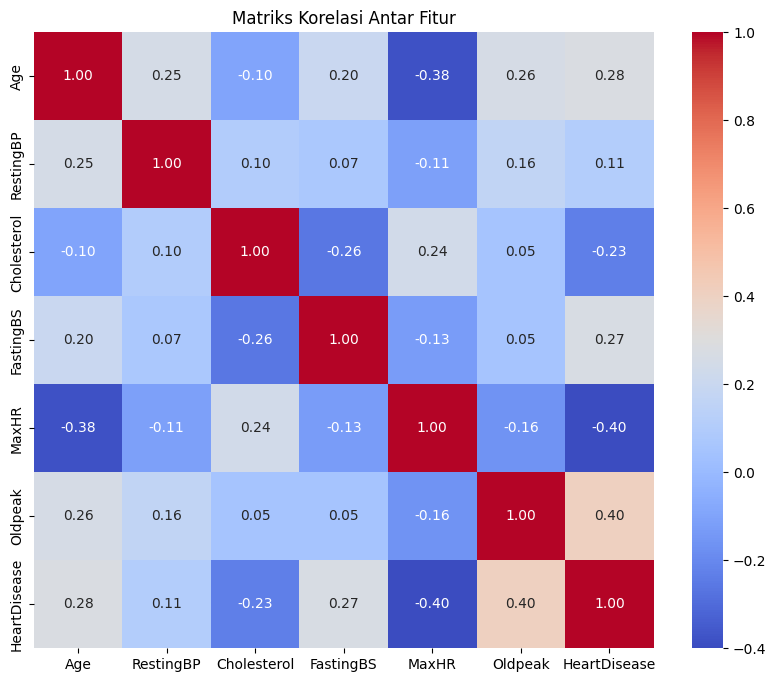

In [407]:
# Menghitung korelasi antar fitur numerik
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

- iii. Visualisasi Korelasi

  Anda juga bisa membuat scatter plot untuk memvisualisasikan hubungan antara dua variabel numerik.

<ipython-input-408-8a8180383d03>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x_col, y=y_col, palette='coolwarm')


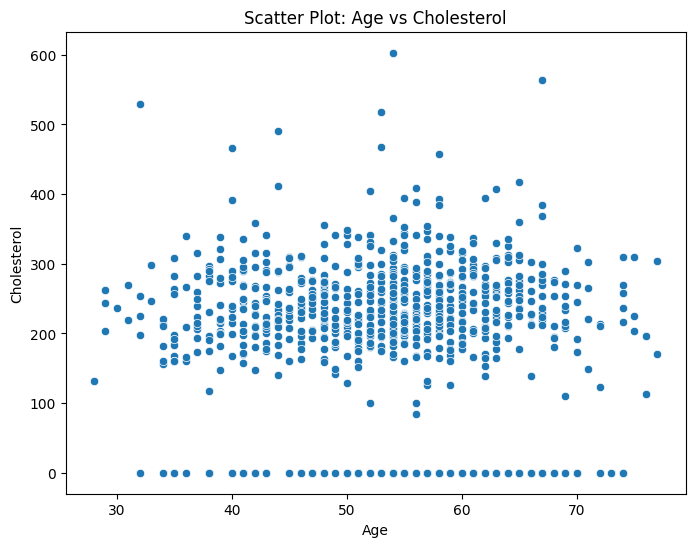

In [408]:
# Scatter plot antara dua fitur (misalnya, age dan cholesterol)
plt.figure(figsize=(8, 6))

# Define the column names for x and y
# Pastikan nama-nama kolom ini sesuai dengan nama di DataFrame kamu
x_col = 'Age'  # Asumsikan 'Age' adalah nama kolom yang benar
y_col = 'Cholesterol'  # Asumsikan 'Cholesterol' adalah nama kolom yang benar

# Buat scatter plot tanpa hue
sns.scatterplot(data=df, x=x_col, y=y_col, palette='coolwarm')

plt.title('Scatter Plot: Age vs Cholesterol')
plt.show()

**d. Visualisasi Data Kategorikal**

- Jika dataset Anda memiliki fitur kategorikal, kita dapat membuat visualisasi grafik batang untuk mengeksplorasi distribusi kategori.

<ipython-input-409-09d5877e56a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


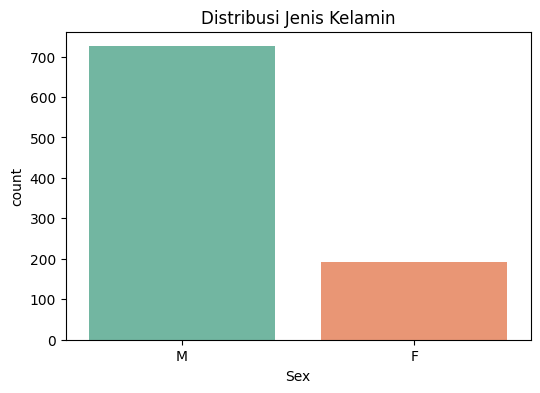

In [409]:
# Visualisasi distribusi untuk fitur kategorikal (misalnya 'sex')
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Distribusi Jenis Kelamin')
plt.show()

- Pairplot untuk Analisis Korelasi Lebih Lanjut
Anda bisa menggunakan pairplot untuk menganalisis korelasi antara beberapa fitur sekaligus.

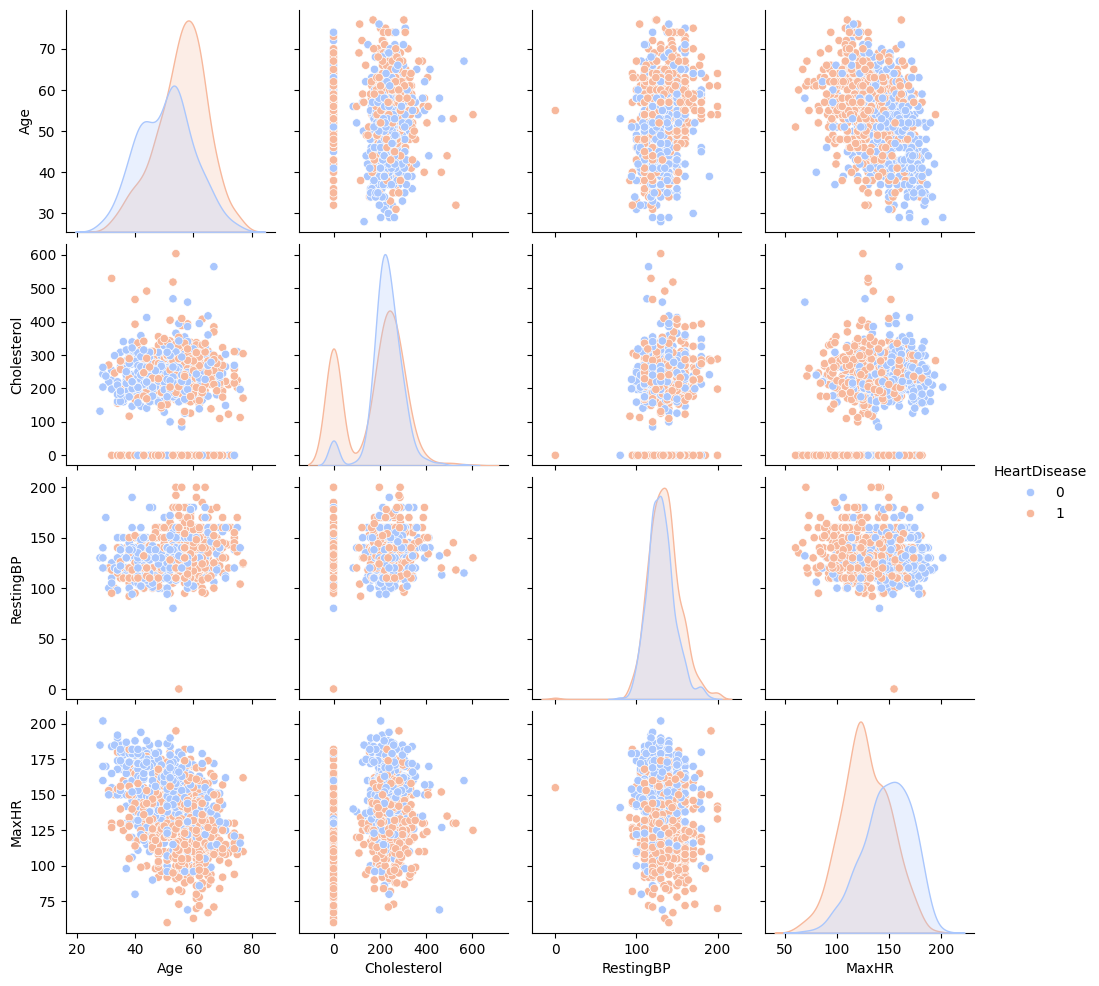

In [410]:
# Visualisasi pairplot untuk melihat hubungan antar beberapa fitur
# Assuming your column names are: 'Age', 'Cholesterol', 'restingBP', 'maxHR', 'heartDisease'
sns.pairplot(df[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'HeartDisease']], hue='HeartDisease', palette='coolwarm')
plt.show()

In [411]:
total_baris = len(df)
print(f"Total baris dalam DataFrame: {total_baris}")

Total baris dalam DataFrame: 918


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [412]:
# 1. Menghapus Missing Values
df.dropna(inplace=True)

In [413]:
# 2. Menghapus Data Duplikat
df.drop_duplicates(inplace=True)
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [414]:
# 3. Standarisasi data numerik
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])


print(df.head())
total_baris = len(df)
print(f"Total baris dalam DataFrame: {total_baris}")

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Total baris dalam DataFrame: 918


In [415]:
# 4. Normalisasi atau Standarisasi Fitur
# Normalisasi atau standarisasi digunakan untuk memastikan bahwa fitur numerik berada pada skala yang sama.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standarisasi (mean = 0, std = 1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['float64', 'int64'])),
                         columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Normalisasi (range = [0,1])
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df.select_dtypes(include=['float64', 'int64'])),
                             columns=df.select_dtypes(include=['float64', 'int64']).columns)

print(df.head())
total_baris = len(df)
print(f"Total baris dalam DataFrame: {total_baris}")

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Total baris dalam DataFrame: 918


penggunaan numeric_df adalah untuk menghindari error TypeError yang Anda alami sebelumnya.

Fungsi quantile yang digunakan untuk menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan Interquartile Range (IQR) hanya dapat beroperasi pada data numerik. Jika DataFrame Anda (df) mengandung kolom dengan tipe data non-numerik (seperti string atau object), fungsi quantile akan menghasilkan error ketika mencoba melakukan operasi matematika (pengurangan) pada kolom tersebut.

Dengan membuat numeric_df menggunakan df.select_dtypes(include=['number']), Anda secara eksplisit memilih hanya kolom-kolom numerik dari DataFrame asli Anda. Ini memastikan bahwa perhitungan quantile hanya dilakukan pada data yang valid, sehingga menghindari error TypeError.

Secara ringkas, penggunaan numeric_df:


1.   Memisahkan data numerik: Memisahkan kolom numerik dari kolom non-numerik dalam DataFrame Anda.
2.   Mencegah error: Mencegah error TypeError yang terjadi ketika fungsi quantile mencoba melakukan operasi matematika pada kolom non-numerik.
3. Memastikan perhitungan yang benar: Memastikan bahwa perhitungan quantile dan IQR hanya dilakukan pada data numerik, sehingga menghasilkan hasil yang akurat.

In [416]:
# 5. Deteksi dan Penanganan Outlier (jika perlu)
# Menggunakan IQR (Interquartile Range) untuk mendeteksi dan menghapus outlier.

# Select only numeric columns before calculating quantiles
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier yang berada di luar 1.5 kali IQR dari Q1 dan Q3
# Apply the outlier filter to the original DataFrame
df_outliers_removed = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [417]:
# 6. Encoding Data Kategorikal
# Untuk data kategorikal, kita bisa menggunakan Label Encoding atau One-Hot Encoding.
from sklearn.preprocessing import LabelEncoder

# Label Encoding: Mengubah data kategorikal menjadi numerik (untuk kolom 'sex')
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Misalnya untuk kolom 'sex'

# One-Hot Encoding: Mengubah kategori menjadi kolom baru dengan nilai 0 atau 1 (untuk kolom 'ChestPainType')
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True) # Changed 'cp' to 'ChestPainType'

In [418]:
# 7. Binning (Pengelompokan Data) (jika perlu)
# Mengelompokkan data numerik ke dalam kategori (misalnya berdasarkan rentang usia).
bins = [29, 39, 49, 59, 69, 100]  # Rentang umur
labels = ['30-39', '40-49', '50-59', '60-69', '70+']  # Nama kategori
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)  # Mengelompokkan berdasarkan usia

# Menampilkan data setelah binning
print(df[['Age', 'age_group']].head())

   Age age_group
0   40     40-49
1   49     40-49
2   37     30-39
3   48     40-49
4   54     50-59


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

1. Tentukan Jumlah Cluster dengan Elbow Method


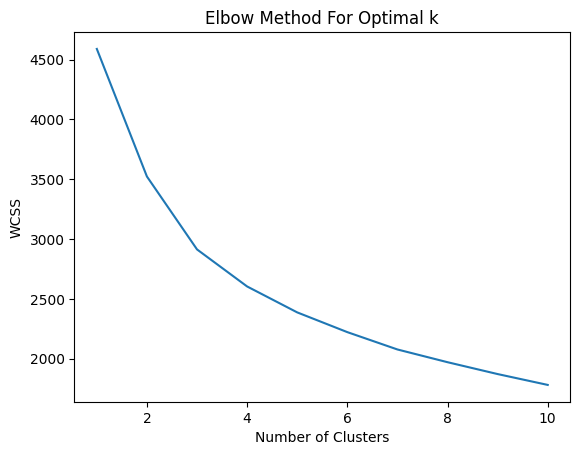

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,age_group,Cluster
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,True,False,False,40-49,0
1,49,0,160,180,0,Normal,156,N,1.0,Flat,1,False,True,False,40-49,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,True,False,False,30-39,0
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,False,False,False,40-49,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,False,True,False,50-59,1


In [430]:
X = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method untuk menemukan jumlah cluster yang optimal
wcss = []  # List untuk menyimpan nilai WCSS
for i in range(1, 11):  # Menguji 1 hingga 10 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(X_scaled)  # Now using the scaled features
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

df.head()

2. Tentukan Model K-Means dan Latih dengan Jumlah Cluster Optimal

In [431]:
# Fit KMeans using the scaled data
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled) # Fit with the scaled features

KMeans(n_clusters=2, random_state=0)

In [432]:
# Predict cluster labels using the scaled data
cluster_labels = kmeans.predict(X_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [433]:
# 4. Calculate the Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.2191509582181142


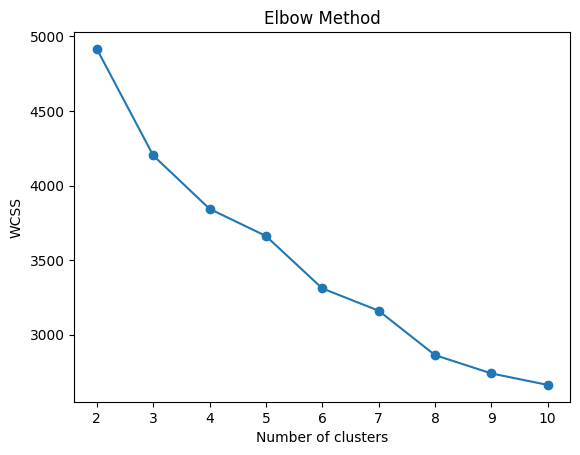

In [434]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [435]:
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {score}")


Silhouette Score for 2 clusters: 0.2304567755056082
Silhouette Score for 3 clusters: 0.23880908306853682
Silhouette Score for 4 clusters: 0.1853864748164648
Silhouette Score for 5 clusters: 0.1751417302370926
Silhouette Score for 6 clusters: 0.18139157619109483
Silhouette Score for 7 clusters: 0.16517710276475953
Silhouette Score for 8 clusters: 0.19237866320132518
Silhouette Score for 9 clusters: 0.18372891110050255
Silhouette Score for 10 clusters: 0.17283671466386244
Silhouette Score for 11 clusters: 0.16264536206719474
Silhouette Score for 12 clusters: 0.1624516995049525
Silhouette Score for 13 clusters: 0.15899233583391
Silhouette Score for 14 clusters: 0.15621573777643447


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [437]:
# Misalnya, df adalah data frame yang berisi data Anda
# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]

# Standarisasi data numerik
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Reduksi dimensi dengan PCA
pca = PCA(n_components=1)
df_reduced = pca.fit_transform(df_scaled)

# Lihat berapa persentase variansi yang terjaga
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2f}")

# Tentukan jumlah klaster yang optimal
optimal_clusters = 2

# Lakukan klasterisasi dengan KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(df_reduced)

# Evaluasi dengan Silhouette Score
score = silhouette_score(df_reduced, labels)
print(f"Silhouette Score setelah Feature Selection: {score}")

Total Variance Explained: 0.31
Silhouette Score setelah Feature Selection: 0.5966524245891827


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

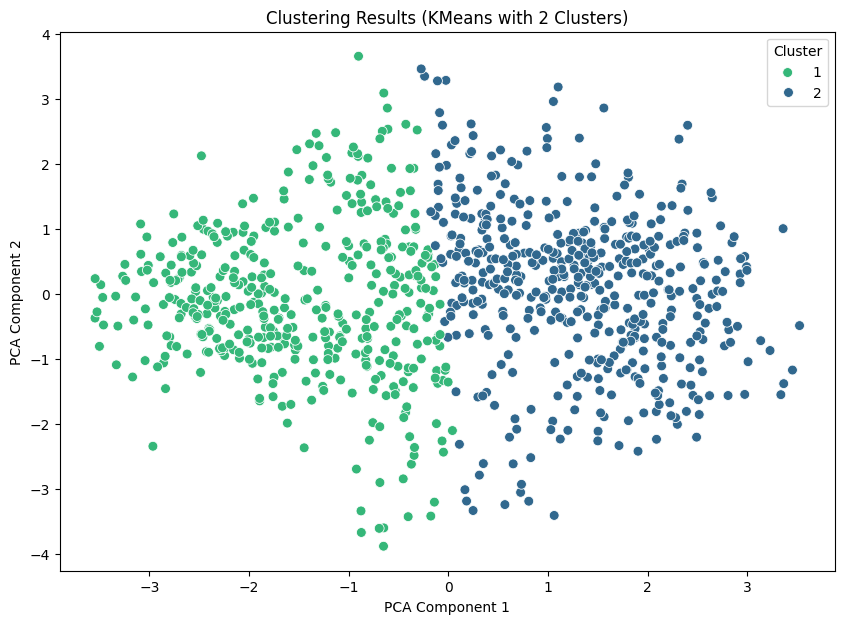

In [438]:
#Type your code here

# Jika data hasil PCA sudah ada dalam 2 dimensi, gunakan langsung
# Jika belum, kurangi dimensi menjadi 2 komponen menggunakan PCA
pca_2d = PCA(n_components=2)
df_2d = pca_2d.fit_transform(df_scaled)  # atau df_reduced jika sudah menggunakan PCA sebelumnya

# Tentukan jumlah cluster optimal (misal, optimal_clusters hasil evaluasi sebelumnya)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(df_2d)

# Buat scatter plot untuk visualisasi clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_2d[:, 0], y=df_2d[:, 1], hue=labels, palette='viridis', s=50)
plt.title(f'Clustering Results (KMeans with {optimal_clusters} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', labels=[str(i) for i in range(1, optimal_clusters + 1)])  # Set legend label dari 1
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

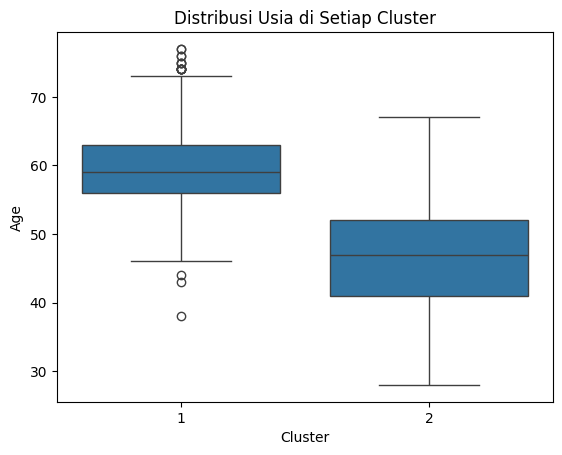

In [439]:
df_clustered = df.copy()
df_clustered['Cluster'] = labels + 1
# Contoh visualisasi distribusi fitur 'Age' dalam setiap cluster
sns.boxplot(x='Cluster', y='Age', data=df_clustered)
plt.title("Distribusi Usia di Setiap Cluster")
plt.show()



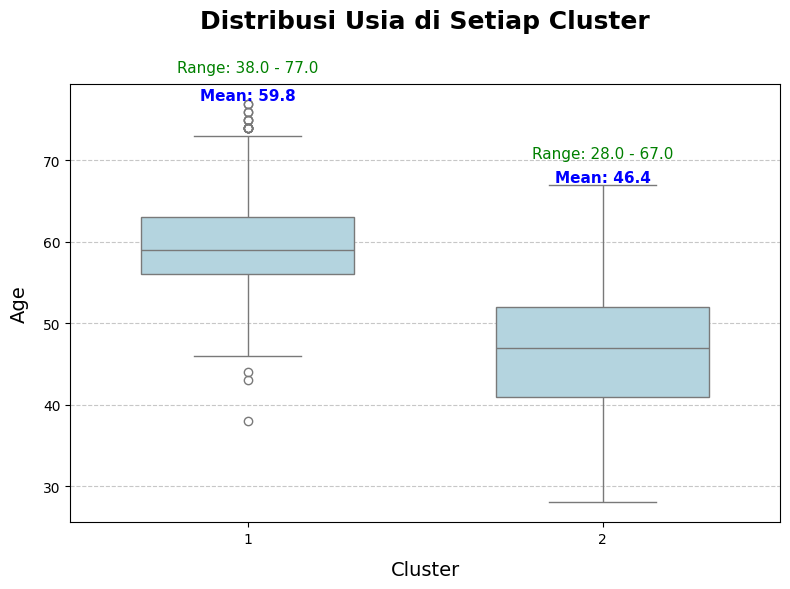

In [445]:
df_clustered['Cluster'] = labels + 1
# Atur ukuran figure agar lebih besar
plt.figure(figsize=(8, 6))

# Buat boxplot
sns.boxplot(x='Cluster', y='Age', data=df_clustered, color='lightblue', width=0.6)

# Tambahkan teks statistik di atas setiap boxplot
for index, row in cluster_stats.iterrows():
    cluster = int(row['Cluster'])
    mean_age = row['mean']
    min_age = row['min']
    max_age = row['max']

    # Tambahkan teks mean dengan jarak vertikal yang lebih tinggi
    plt.text(cluster -1 , max_age + (max_age * 0.005), f"Mean: {mean_age:.1f}",
             ha='center', color='blue', fontsize=11, weight='bold')

    # Tambahkan teks range dengan posisi lebih tinggi dari teks mean
    plt.text(cluster -1, max_age + (max_age * 0.05), f"Range: {min_age} - {max_age}",
             ha='center', color='green', fontsize=11)

# Tambahkan judul dan label
plt.title("Distribusi Usia di Setiap Cluster", fontsize=18, weight='bold', pad=40)
plt.xlabel("Cluster", fontsize=14, labelpad=10)
plt.ylabel("Age", fontsize=14, labelpad=10)

# Tambahkan grid untuk memperjelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Sesuaikan layout agar elemen tidak terpotong
plt.tight_layout()
plt.show()


In [447]:
# Display first and last 5 rows together
pd.concat([df.head(), df.tail()])

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,age_group,Cluster
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,True,False,False,40-49,0
1,49,0,160,180,0,Normal,156,N,1.0,Flat,1,False,True,False,40-49,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,True,False,False,30-39,0
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,False,False,False,40-49,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,False,True,False,50-59,1
913,45,1,110,264,0,Normal,132,N,1.2,Flat,1,False,False,True,40-49,0
914,68,1,144,193,1,Normal,141,N,3.4,Flat,1,False,False,False,60-69,1
915,57,1,130,131,0,Normal,115,Y,1.2,Flat,1,False,False,False,50-59,1
916,57,0,130,236,0,LVH,174,N,0.0,Flat,1,True,False,False,50-59,1
917,38,1,138,175,0,Normal,173,N,0.0,Up,0,False,True,False,30-39,0


Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan distribusi usia:

1.  **Kluster 1:**

 - Rata-rata usia: sekitar 60 tahun.
 - Rentang usia utama: 38 - 77 tahun.
 - Analisis: Kluster ini mencakup individu dengan usia yang lebih tua. Kelompok ini cenderung memiliki karakteristik yang mungkin berbeda dari kelompok usia yang lebih muda, baik dalam hal kesehatan, gaya hidup, maupun kebutuhan mereka. Cluster ini mungkin membutuhkan perhatian khusus dalam penawaran produk atau layanan yang lebih sesuai dengan usia mereka, misalnya layanan kesehatan atau rencana pensiun.

2.   **Kluster 2:**

 - Rata-rata usia: sekitar 46 tahun.
 - Rentang usia utama: 28 - 67 tahun.
 - Analisis: Kluster ini mencakup individu dengan usia yang relatif lebih muda dibandingkan dengan Kluster 1. Kelompok ini mungkin memiliki kebutuhan atau preferensi yang berbeda, seperti layanan yang lebih aktif atau kebutuhan keluarga. Rentang usia yang lebih luas dalam kluster ini menunjukkan keragaman dalam profil individu, sehingga penawaran produk atau layanan perlu lebih fleksibel untuk mencakup kebutuhan dari beberapa rentang usia.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [448]:
# Simpan DataFrame dengan kolom cluster ke dalam file CSV
df_clustered.to_csv('hasil_kluster.csv', index=False)

print("Data berhasil diekspor ke 'hasil_kluster.csv'")

Data berhasil diekspor ke 'hasil_kluster.csv'
